# Chapter 5: 多変数のメトロポリス法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(24)

5.1 多変数のガウス分布

In [41]:
def main():
    n_iter = 10**5
    step_size_x, step_size_y = 1/2,  1/2
    
    xs, ys = [], []
    x, y = 0, 0
    n_accept = 0

    for i in range(1, n_iter+1):
        backup_x, backup_y = x, y

        action_init = 1/2*(x**2+y**2+x*y)
        
        # dx, dy ~ Uniform(-step_size, step_size)
        dx, dy = np.random.rand(), np.random.rand()
        dx, dy = (dx-1/2)*step_size_x*2, (dy-1/2)*step_size_y*2
        
        x += dx
        y += dy
        
        action_fin=1/2*(x**2+y**2+x*y)
        
        # メトロポリステスト
        metropolis = np.random.rand()
        if np.exp(action_init-action_fin) > metropolis:
            # 受理
            n_accept+= 1
        else:
            # 棄却
            x, y = backup_x, backup_y
        xs.append(x)
        ys.append(y)

    return xs, ys

def select_per_n(xs, n):
    return [ xs[i] for i in range(len(xs)) if i % n == 0]

xs, ys = main()
n = 10
xs, ys = select_per_n(xs, 10), select_per_n(ys, 10)

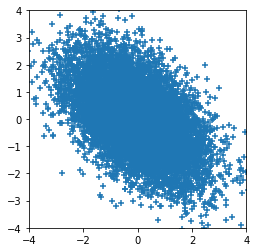

In [42]:
g = plt.subplot()

g.scatter(xs, ys, marker="+");
g.set_ylim([-4,4])
g.set_xlim([-4,4])
g.set_aspect('equal')

4.4 ガウス分布以外の例

In [12]:
def main():
    n_iter = 10**5
    step_size = 1/2
    
    xs = []
    x = 0
    n_accept = 0

    for i in range(1, n_iter+1):
        backup_x = x

        action_init = -np.log(np.exp(-1/2*(x-3)*(x-3))
                                              + np.exp(-1/2*(x+3)*(x+3)))
        
        # dx ~ Uniform(-step_size, step_size)
        dx = np.random.rand()
        dx = (dx-1/2)*step_size*2
        
        x += dx
        
        action_fin=-np.log(np.exp(-1/2*(x-3)*(x-3))
                                              + np.exp(-1/2*(x+3)*(x+3)))
        
        # メトロポリステスト
        metropolis = np.random.rand()
        if np.exp(action_init-action_fin) > metropolis:
            # 受理
            n_accept+= 1
        else:
            # 棄却
            x = backup_x
        
        # print("x_{} = {}".format(n_accept, x))
        xs.append(x)
    return xs
xs = main()   

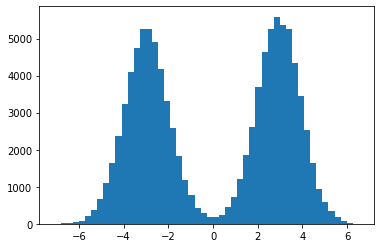

In [13]:
plt.hist(xs, bins=50);